In [122]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import re
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


In [81]:
import warnings

warnings.filterwarnings('ignore')

In [82]:
dados = pd.read_csv(
    r"D:\tensorflowteste\excelfiles\obras.csv",sep=";")

In [83]:
def apply_regex(cell):
    if isinstance(cell, str):
        return re.sub(r'[^0-9.,]', '0', cell)
    return cell

In [84]:

def format_number(x):
    return f'{x:.2f}' 

pd.options.display.float_format = format_number

In [85]:

check_str_columns_list = ['Badges_Potencial_presente', 'Badges_Potencial_presente_m2'
                          , 'Badges_valor_medio', 'Badges - Quantidade de obras'
                          ,'Caracteristicas_obras _Duracao_media_obras'
                          ,'Caracteristicas_obras _Quantidade_de_obras','valor_metragem_total'
                          ,'Caracteristicas_das_obras _Valor_metragem_media'
                          ,'Caracteristicas_das_obras _Valor_total_obras','Caracteristicas_obras_ Valor_medio'
                          ,'Potencial_vendas _Potencial_futurom2','Potencial_vendas_Potencial_presente_m2'
                          ,'Potencial_de_vendas _Potencial_futuro'
                          ,'Potencial_de_vendas_Potencial_presente'
                          ]
dados[check_str_columns_list] = dados[check_str_columns_list].applymap(apply_regex)

In [86]:
dados[['Badges_Potencial_presente', 'Badges_Potencial_presente_m2'
                          , 'Badges_valor_medio', 'Badges - Quantidade de obras'
                          ,'Caracteristicas_obras _Duracao_media_obras'
                          ,'Caracteristicas_obras _Quantidade_de_obras','valor_metragem_total'
                          ,'Caracteristicas_das_obras _Valor_metragem_media'
                          ,'Caracteristicas_das_obras _Valor_total_obras','Caracteristicas_obras_ Valor_medio'
                          ,'Potencial_vendas _Potencial_futurom2','Potencial_vendas_Potencial_presente_m2'
                          ,'Potencial_de_vendas _Potencial_futuro'
                          ,'Potencial_de_vendas_Potencial_presente'
                          ]]= dados[['Badges_Potencial_presente', 'Badges_Potencial_presente_m2'
                          , 'Badges_valor_medio', 'Badges - Quantidade de obras'
                          ,'Caracteristicas_obras _Duracao_media_obras'
                          ,'Caracteristicas_obras _Quantidade_de_obras','valor_metragem_total'
                          ,'Caracteristicas_das_obras _Valor_metragem_media'
                          ,'Caracteristicas_das_obras _Valor_total_obras','Caracteristicas_obras_ Valor_medio'
                          ,'Potencial_vendas _Potencial_futurom2','Potencial_vendas_Potencial_presente_m2'
                          ,'Potencial_de_vendas _Potencial_futuro'
                          ,'Potencial_de_vendas_Potencial_presente'
                          ]].applymap(lambda k: float(str(k).replace(",",".")))

In [87]:
"""descartar linhas com comprimento de 'localizacao_contato_uf' maior que 3"""
dados = dados[dados['localizacao_contato_uf'].apply(lambda x: len(str(x)) <= 3)]

In [88]:
obrasregioes = dados.groupby(['localizacao_contato_uf'])[['Badges_Potencial_presente', 'Badges_Potencial_presente_m2'
                                                          , 'Badges_valor_medio', 'Badges - Quantidade de obras'
                                                          , 'Caracteristicas_obras _Duracao_media_obras'
                                                          , 'Caracteristicas_obras _Quantidade_de_obras'
                                                          , 'valor_metragem_total', 'Caracteristicas_das_obras _Valor_metragem_media'
                                                          , 'Caracteristicas_das_obras _Valor_total_obras'
                                                          , 'Caracteristicas_obras_ Valor_medio'
                                                          , 'Potencial_vendas _Potencial_futurom2'
                                                          , 'Potencial_vendas_Potencial_presente_m2'
                                                          , 'Potencial_de_vendas _Potencial_futuro'
                                                          , 'Potencial_de_vendas_Potencial_presente']].sum().reset_index()


In [89]:
df_obras = obrasregioes[['localizacao_contato_uf','Caracteristicas_das_obras _Valor_total_obras'
              ,'valor_metragem_total','Caracteristicas_obras _Quantidade_de_obras','Potencial_vendas_Potencial_presente_m2'
              ,'Potencial_de_vendas _Potencial_futuro','Potencial_de_vendas_Potencial_presente','Badges_Potencial_presente','Potencial_vendas _Potencial_futurom2','Potencial_vendas_Potencial_presente_m2','Badges_Potencial_presente_m2']]

In [90]:
obras = df_obras.groupby('localizacao_contato_uf')[['Caracteristicas_das_obras _Valor_total_obras'
              ,'valor_metragem_total','Caracteristicas_obras _Quantidade_de_obras','Potencial_vendas_Potencial_presente_m2'
              ,'Potencial_de_vendas _Potencial_futuro','Potencial_de_vendas_Potencial_presente','Badges_Potencial_presente','Potencial_vendas _Potencial_futurom2','Potencial_vendas_Potencial_presente_m2','Badges_Potencial_presente_m2']].sum().reset_index()

In [91]:
vendas = pd.read_csv(r"D:\tensorflowteste\excelfiles\baseteste.csv",sep=";")


In [92]:
vendasdf = vendas[['totalVenda','totalDesconto','lojanome','uf'
        ,'pedidoShowroom','cod_unidade','data_atualizado','Regiao','Pais','PIB']]

In [93]:


vendasdf[['totalVenda','totalDesconto','PIB']] = vendasdf[['totalVenda','totalDesconto','PIB']].applymap(lambda k: float(str(k).replace(",",".")))
vendasdf['data_atualizado'] = pd.to_datetime(vendasdf['data_atualizado'],errors='coerce')

vendasdf[['pedidoShowroom','cod_unidade']] = vendasdf[['pedidoShowroom','cod_unidade']].astype(int)
vendas = vendasdf.groupby(['lojanome','uf','cod_unidade','Regiao','PIB','data_atualizado'])[['totalVenda','totalDesconto']].sum().reset_index()

In [94]:
regiao_economica = pd.read_csv(
    r"D:\tensorflowteste\excelfiles\economia_Regiao.csv",sep=";",encoding="latin-1")



In [95]:
regiao_economica[['numero_de_empresas','pessoal_ocupado','Assalariado'
                  ,'salarios_e_outras']] = regiao_economica[['numero_de_empresas','pessoal_ocupado'
                                                             ,'Assalariado','salarios_e_outras']].applymap(lambda k: float(str(k).replace(",",".")))

In [96]:
vendas

,lojanome,uf,cod_unidade,Regiao,PIB,data_atualizado,totalVenda,totalDesconto
0,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00
1,Araçatuba,SP,36,Sudeste,2377639.00,2023-04-20 16:30:27.237,11654879900.84,266016.51
2,Atibaia,SP,96,Sudeste,2377639.00,2023-04-20 16:30:27.237,11760826.67,30947.27
3,Avaré,SP,69,Sudeste,2377639.00,2023-04-20 16:30:27.237,23715315.52,16204.43
4,Balneário Camboriú,SC,58,Sul,349275.00,2023-04-20 16:30:27.237,45510836.81,77808.48
...,...,...,...,...,...,...,...,...
84,Uberlândia,MG,102,Sudeste,682786.00,2023-04-20 16:30:27.237,119076561.74,2635.93
85,Ubá - MG,MG,133,Sudeste,682786.00,2023-04-20 16:30:27.237,65841757.92,511.81
86,Valinhos,SP,122,Sudeste,2377639.00,2023-04-20 16:30:27.237,102731120.10,85071.78
87,Vila Velha,ES,108,Sudeste,138446.00,2023-04-20 16:30:27.237,287763589.40,29066.97


In [97]:


result_df = vendas.merge(regiao_economica, left_on='Regiao', right_on='local', how='left')

In [98]:
result_df

,lojanome,uf,cod_unidade,Regiao,PIB,data_atualizado,totalVenda,totalDesconto,codigo_CNAE,secoes_classificacao_atividades,natureza_juridica,numero_de_empresas,pessoal_ocupado,Assalariado,salarios_e_outras,local
0,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,NaN,Total,Administração pública,5915.00,3544568.00,3544563.00,220761965.60,Sudeste
1,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,NaN,Total,Entidades empresariais,2677440.00,22449792.00,18665294.00,758432485.20,Sudeste
2,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,NaN,Total,Entidades sem fins lucrativos,233186.00,2008959.00,1873791.00,79293874.86,Sudeste
3,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,A,"Agricultura, pecuária, produção florestal, pes...",Total,74720.00,258584.00,169410.00,5362407.50,Sudeste
4,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,A,"Agricultura, pecuária, produção florestal, pes...",Administração pública,1.00,0.00,0.00,0.00,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,Vitória - Praia do Canto,ES,110,Sudeste,138446.00,2023-04-20 16:30:27.237,1281485330.16,88236.14,S,Outras atividades de serviços,Entidades sem fins lucrativos,72976.00,226138.00,185255.00,6698943.03,Sudeste
7383,Vitória - Praia do Canto,ES,110,Sudeste,138446.00,2023-04-20 16:30:27.237,1281485330.16,88236.14,U,Organismos internacionais e outras instituiçõe...,Total,89.00,928.00,900.00,97094.00,Sudeste
7384,Vitória - Praia do Canto,ES,110,Sudeste,138446.00,2023-04-20 16:30:27.237,1281485330.16,88236.14,U,Organismos internacionais e outras instituiçõe...,Administração pública,0.00,0.00,0.00,0.00,Sudeste
7385,Vitória - Praia do Canto,ES,110,Sudeste,138446.00,2023-04-20 16:30:27.237,1281485330.16,88236.14,U,Organismos internacionais e outras instituiçõe...,Entidades empresariais,0.00,0.00,0.00,0.00,Sudeste


In [99]:
merged_df = pd.merge(result_df, obras,left_on='uf',right_on='localizacao_contato_uf', how='inner')


merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

In [100]:
merged_df[['uf', 'cod_unidade',  'PIB', 'totalVenda',
       'totalDesconto',
       'numero_de_empresas', 'pessoal_ocupado',
       'Assalariado', 'salarios_e_outras', 
       'Caracteristicas_das_obras _Valor_total_obras', 'valor_metragem_total',
       'Caracteristicas_obras _Quantidade_de_obras',
       'Potencial_vendas_Potencial_presente_m2',
       'Potencial_de_vendas _Potencial_futuro',
       'Potencial_de_vendas_Potencial_presente', 'Badges_Potencial_presente',
       'Potencial_vendas _Potencial_futurom2', 'Badges_Potencial_presente_m2','data_atualizado','Regiao']]

,uf,cod_unidade,PIB,totalVenda,totalDesconto,numero_de_empresas,pessoal_ocupado,Assalariado,salarios_e_outras,Caracteristicas_das_obras _Valor_total_obras,valor_metragem_total,Caracteristicas_obras _Quantidade_de_obras,Potencial_vendas_Potencial_presente_m2,Potencial_de_vendas _Potencial_futuro,Potencial_de_vendas_Potencial_presente,Badges_Potencial_presente,Potencial_vendas _Potencial_futurom2,Badges_Potencial_presente_m2,data_atualizado,Regiao
0,SP,107,2377639.00,218424.50,0.00,5915.00,3544568.00,3544563.00,220761965.60,18659590823.03,46621515.03,226212.00,3204299.24,499403191.00,320429924.00,320429924.00,4994031.91,3204299.24,2023-04-20 16:30:27.237,Sudeste
1,SP,107,2377639.00,218424.50,0.00,2677440.00,22449792.00,18665294.00,758432485.20,18659590823.03,46621515.03,226212.00,3204299.24,499403191.00,320429924.00,320429924.00,4994031.91,3204299.24,2023-04-20 16:30:27.237,Sudeste
2,SP,107,2377639.00,218424.50,0.00,233186.00,2008959.00,1873791.00,79293874.86,18659590823.03,46621515.03,226212.00,3204299.24,499403191.00,320429924.00,320429924.00,4994031.91,3204299.24,2023-04-20 16:30:27.237,Sudeste
3,SP,107,2377639.00,218424.50,0.00,74720.00,258584.00,169410.00,5362407.50,18659590823.03,46621515.03,226212.00,3204299.24,499403191.00,320429924.00,320429924.00,4994031.91,3204299.24,2023-04-20 16:30:27.237,Sudeste
4,SP,107,2377639.00,218424.50,0.00,1.00,0.00,0.00,0.00,18659590823.03,46621515.03,226212.00,3204299.24,499403191.00,320429924.00,320429924.00,4994031.91,3204299.24,2023-04-20 16:30:27.237,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,PI,16,56391.00,347345353.98,162687.00,31567.00,89814.00,65501.00,1533128.72,30515146.00,1349524.64,6077.00,62480.61,14139115.00,6248061.00,6248061.00,141391.15,62480.61,2023-04-20 16:30:27.237,Nordeste
7383,PI,16,56391.00,347345353.98,162687.00,9.00,0.00,0.00,0.00,30515146.00,1349524.64,6077.00,62480.61,14139115.00,6248061.00,6248061.00,141391.15,62480.61,2023-04-20 16:30:27.237,Nordeste
7384,PI,16,56391.00,347345353.98,162687.00,0.00,0.00,0.00,0.00,30515146.00,1349524.64,6077.00,62480.61,14139115.00,6248061.00,6248061.00,141391.15,62480.61,2023-04-20 16:30:27.237,Nordeste
7385,PI,16,56391.00,347345353.98,162687.00,0.00,0.00,0.00,0.00,30515146.00,1349524.64,6077.00,62480.61,14139115.00,6248061.00,6248061.00,141391.15,62480.61,2023-04-20 16:30:27.237,Nordeste


In [101]:
import numpy as np

In [102]:
np.unique(merged_df['Regiao'], return_counts=True)

(array(['Nordeste', 'Norte', 'Sudeste', 'Sul'], dtype=object),
 array([ 664,  249, 4565, 1909], dtype=int64))

<Axes: xlabel='Regiao', ylabel='count'>

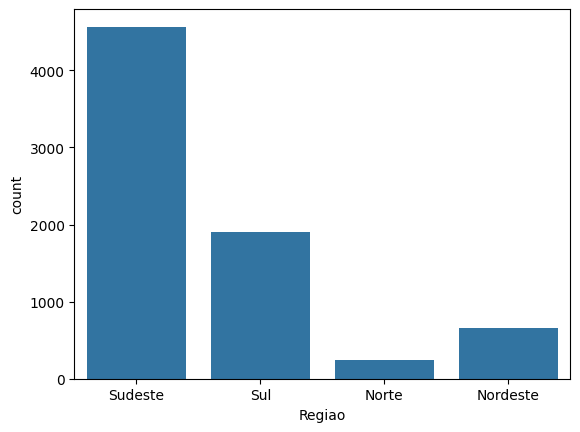

In [103]:
sns.countplot(x = merged_df['Regiao'])

In [104]:
X_vendas = merged_df.iloc[:,0:-1].values

In [105]:
X_vendas

array([['Americana - ANTIGA', 'SP', 107, ..., 320429924.0, 320429924.0,
        4994031.91],
       ['Americana - ANTIGA', 'SP', 107, ..., 320429924.0, 320429924.0,
        4994031.91],
       ['Americana - ANTIGA', 'SP', 107, ..., 320429924.0, 320429924.0,
        4994031.91],
       ...,
       ['Teresina', 'PI', 16, ..., 6248061.0, 6248061.0, 141391.15],
       ['Teresina', 'PI', 16, ..., 6248061.0, 6248061.0, 141391.15],
       ['Teresina', 'PI', 16, ..., 6248061.0, 6248061.0, 141391.15]],
      dtype=object)

In [106]:
y_vendas = merged_df.iloc[:,-1]

In [107]:
for i,row in enumerate(merged_df.columns):
    print(i, row)


0 lojanome
1 uf
2 cod_unidade
3 Regiao
4 PIB
5 data_atualizado
6 totalVenda
7 totalDesconto
8 codigo_CNAE
9 secoes_classificacao_atividades
10 natureza_juridica
11 numero_de_empresas
12 pessoal_ocupado
13 Assalariado
14 salarios_e_outras
15 local
16 localizacao_contato_uf
17 Caracteristicas_das_obras _Valor_total_obras
18 valor_metragem_total
19 Caracteristicas_obras _Quantidade_de_obras
20 Potencial_vendas_Potencial_presente_m2
21 Potencial_de_vendas _Potencial_futuro
22 Potencial_de_vendas_Potencial_presente
23 Badges_Potencial_presente
24 Potencial_vendas _Potencial_futurom2
25 Badges_Potencial_presente_m2


In [108]:
y_vendas

0      3204299.24
1      3204299.24
2      3204299.24
3      3204299.24
4      3204299.24
          ...    
7382     62480.61
7383     62480.61
7384     62480.61
7385     62480.61
7386     62480.61
Name: Badges_Potencial_presente_m2, Length: 7387, dtype: float64

In [109]:
merged_df.columns

Index(['lojanome', 'uf', 'cod_unidade', 'Regiao', 'PIB', 'data_atualizado',
       'totalVenda', 'totalDesconto', 'codigo_CNAE',
       'secoes_classificacao_atividades', 'natureza_juridica',
       'numero_de_empresas', 'pessoal_ocupado', 'Assalariado',
       'salarios_e_outras', 'local', 'localizacao_contato_uf',
       'Caracteristicas_das_obras _Valor_total_obras', 'valor_metragem_total',
       'Caracteristicas_obras _Quantidade_de_obras',
       'Potencial_vendas_Potencial_presente_m2',
       'Potencial_de_vendas _Potencial_futuro',
       'Potencial_de_vendas_Potencial_presente', 'Badges_Potencial_presente',
       'Potencial_vendas _Potencial_futurom2', 'Badges_Potencial_presente_m2'],
      dtype='object')

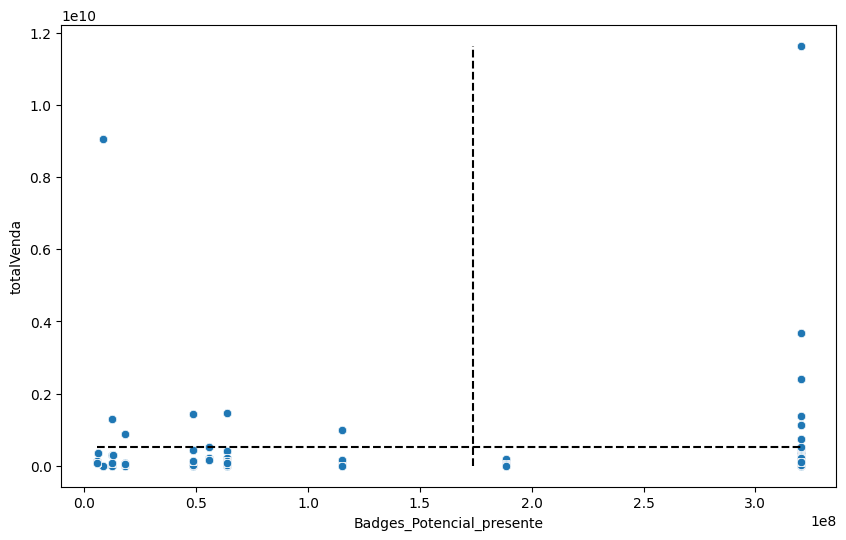

In [121]:


x = merged_df['Badges_Potencial_presente']
y = merged_df['totalVenda']


ax = sns.scatterplot(data=merged_df, x='Badges_Potencial_presente', y='totalVenda')
ax.figure.set_size_inches(10, 6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')

plt.show()

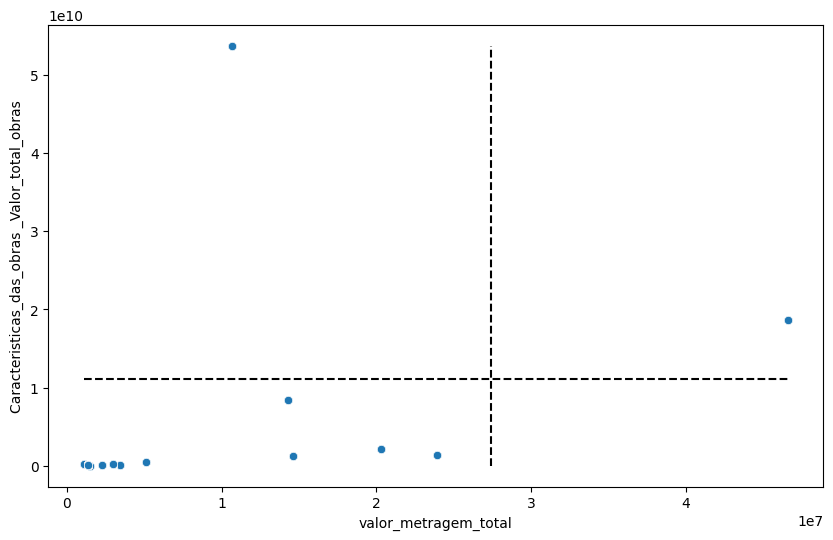

In [120]:

x = merged_df['valor_metragem_total']
y = merged_df['Caracteristicas_das_obras _Valor_total_obras']

ax = sns.scatterplot(data=merged_df, x='valor_metragem_total', y='Caracteristicas_das_obras _Valor_total_obras')
ax.figure.set_size_inches(10, 6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')

plt.show()

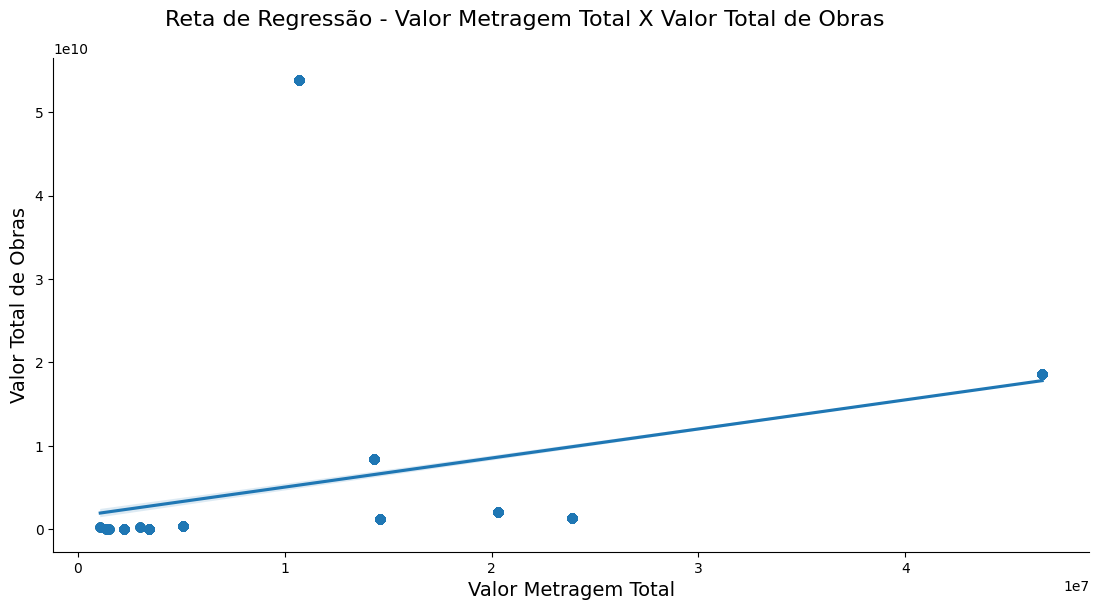

In [119]:

X = merged_df['valor_metragem_total']
y = merged_df['Caracteristicas_das_obras _Valor_total_obras']

ax = sns.lmplot(x='valor_metragem_total', y='Caracteristicas_das_obras _Valor_total_obras', data=merged_df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Valor Metragem Total X Valor Total de Obras', fontsize=16, y=1.02)
ax.set_xlabels("Valor Metragem Total", fontsize=14)
ax.set_ylabels("Valor Total de Obras", fontsize=14)

plt.show()

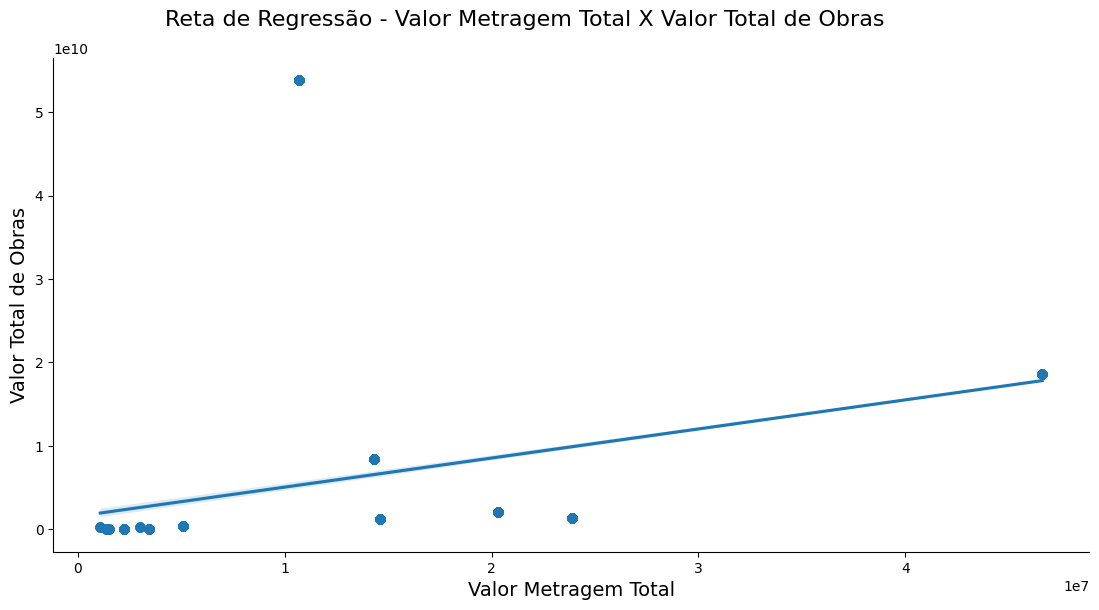

In [118]:
X = merged_df['valor_metragem_total']
y = merged_df['Caracteristicas_das_obras _Valor_total_obras']

ax = sns.lmplot(x='valor_metragem_total', y='Caracteristicas_das_obras _Valor_total_obras', data=merged_df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Valor Metragem Total X Valor Total de Obras', fontsize=16, y=1.02)
ax.set_xlabels("Valor Metragem Total", fontsize=14)
ax.set_ylabels("Valor Total de Obras", fontsize=14)

plt.show()

In [110]:

"""Teste conversao Variaveis"""

numeric_cols = ['PIB', 'numero_de_empresas', 'pessoal_ocupado', 'Assalariado', 'salarios_e_outras',
                'Caracteristicas_das_obras _Valor_total_obras', 'valor_metragem_total',
                'Caracteristicas_obras _Quantidade_de_obras', 'Potencial_vendas_Potencial_presente_m2',
                'Potencial_de_vendas _Potencial_futuro', 'Potencial_de_vendas_Potencial_presente',
                'Badges_Potencial_presente', 'Potencial_vendas _Potencial_futurom2', 'Badges_Potencial_presente_m2']


def preprocess_data(df):
   
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    
    if 'totalVenda' in categorical_cols:
        categorical_cols.remove('totalVenda')

  
    numeric_transformer = StandardScaler()

   
    categorical_transformer = OneHotEncoder()

  

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

   
    X = df.drop('totalVenda', axis=1)
    y = df['totalVenda']

    
    X_preprocessed = preprocessor.fit_transform(X)

    return X_preprocessed, y


X, y = preprocess_data(merged_df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [111]:
X_test

<1478x183 sparse matrix of type '<class 'numpy.float64'>'
	with 32516 stored elements in Compressed Sparse Row format>

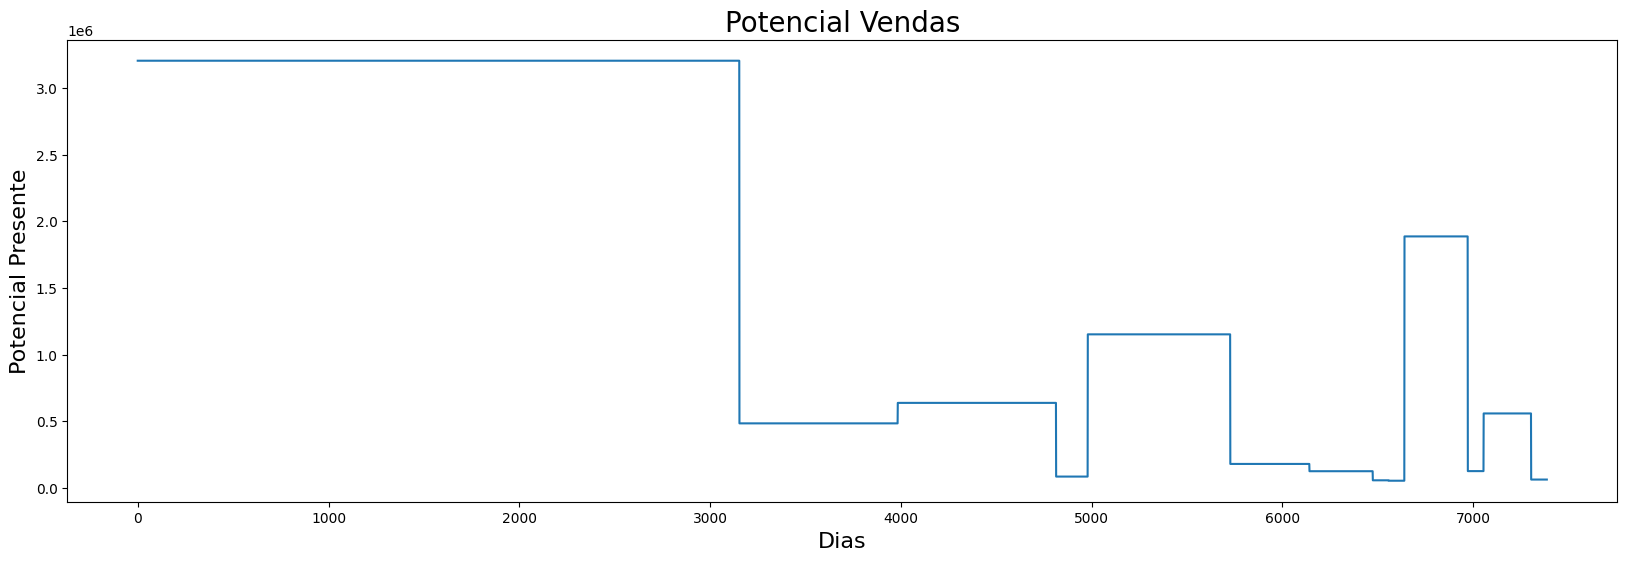

In [115]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Potencial Vendas', fontsize=20)
ax.set_ylabel('Potencial Presente', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = merged_df['Potencial_vendas_Potencial_presente_m2'].plot()

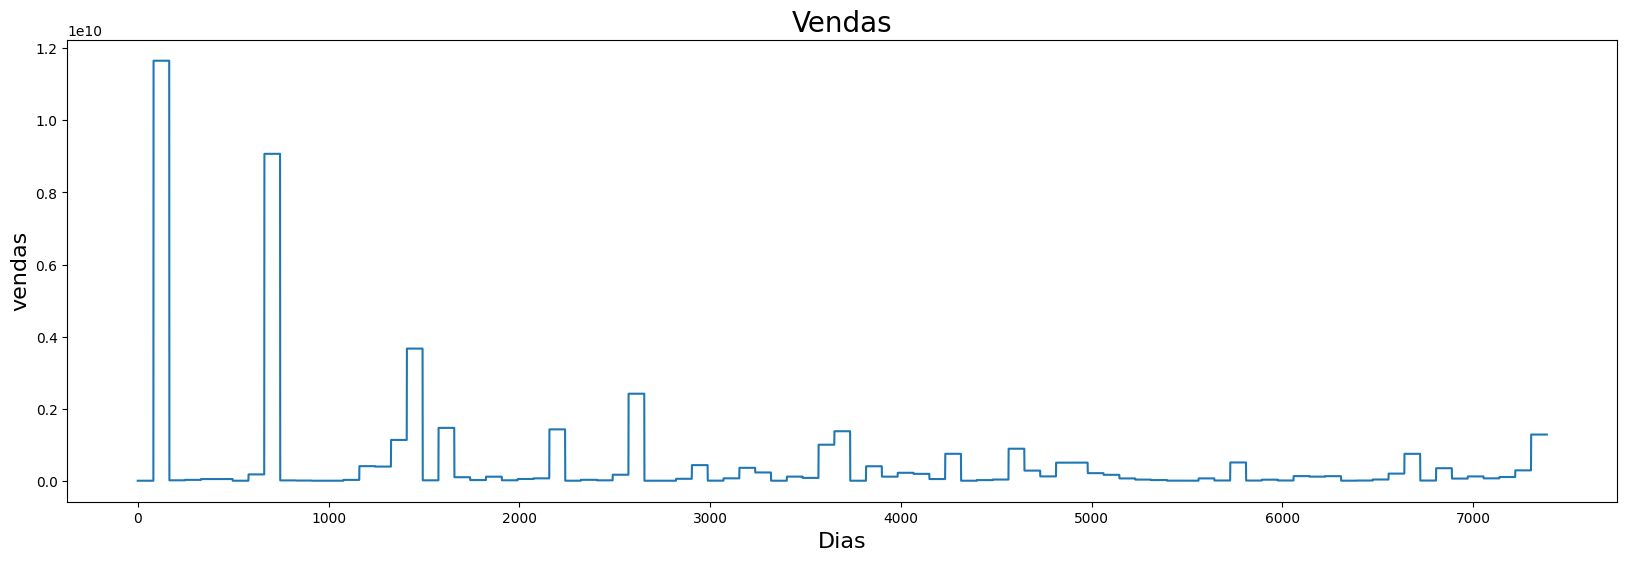

In [112]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Vendas', fontsize=20)
ax.set_ylabel('vendas', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = result_df['totalVenda'].plot()

In [116]:
merged_df

,lojanome,uf,cod_unidade,Regiao,PIB,data_atualizado,totalVenda,totalDesconto,codigo_CNAE,secoes_classificacao_atividades,...,uf_ES,uf_MG,uf_PA,uf_PE,uf_PI,uf_PR,uf_RJ,uf_RS,uf_SC,uf_SP
0,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,NaN,Total,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,NaN,Total,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,NaN,Total,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,A,"Agricultura, pecuária, produção florestal, pes...",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,Americana - ANTIGA,SP,107,Sudeste,2377639.00,2023-04-20 16:30:27.237,218424.50,0.00,A,"Agricultura, pecuária, produção florestal, pes...",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,Teresina,PI,16,Nordeste,56391.00,2023-04-20 16:30:27.237,347345353.98,162687.00,S,Outras atividades de serviços,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
7383,Teresina,PI,16,Nordeste,56391.00,2023-04-20 16:30:27.237,347345353.98,162687.00,U,Organismos internacionais e outras instituiçõe...,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
7384,Teresina,PI,16,Nordeste,56391.00,2023-04-20 16:30:27.237,347345353.98,162687.00,U,Organismos internacionais e outras instituiçõe...,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
7385,Teresina,PI,16,Nordeste,56391.00,2023-04-20 16:30:27.237,347345353.98,162687.00,U,Organismos internacionais e outras instituiçõe...,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [117]:

encoder = OneHotEncoder(sparse=False)
uf_encoded = encoder.fit_transform(merged_df[['uf']])



uf_df = pd.DataFrame(uf_encoded, columns=encoder.get_feature_names_out(['uf']))


merged_df = pd.concat([merged_df, uf_df], axis=1)


X = merged_df[['PIB', 'totalVenda',
       'totalDesconto',
       'numero_de_empresas', 'pessoal_ocupado',
       'Assalariado', 'salarios_e_outras', 
       'Caracteristicas_das_obras _Valor_total_obras', 'valor_metragem_total',
       'Caracteristicas_obras _Quantidade_de_obras',
       'Potencial_vendas_Potencial_presente_m2',
       'Potencial_de_vendas _Potencial_futuro',
       'Potencial_de_vendas_Potencial_presente', 'Badges_Potencial_presente',
       'Potencial_vendas _Potencial_futurom2', 'Badges_Potencial_presente_m2'] + list(uf_df.columns)]

y = merged_df['totalVenda']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1) 
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-8),
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])


model.fit(X_train, y_train, epochs=400, batch_size=128, verbose=0, validation_split=0.1)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


result_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred.flatten()})
print(result_df)



47/47 [==============================] - 0s 1ms/step
Mean Squared Error: 9620365465373586.0
R-squared: 0.9958015787579833
              Real      Previsto
7263  164182071.46  174587312.00
4489    6390332.75   34629128.00
1539  357913098.00  318084832.00
3532 1425184558.19 1386994688.00
7360  347345353.98  345148928.00
...            ...           ...
1740 1373124314.80  989088704.00
4609   59834787.65   90182832.00
1844  747110267.36  871053248.00
5155  111932494.83  142513392.00
6121   31081963.56   41377632.00

[1478 rows x 2 columns]


In [ ]:
"""Executa Previsao Futura proximos 6 meses e faz calculo de probabilidade de Loja vender determinado valor definido ao mes"""
X_future = pd.DataFrame(X_test.copy())  
for _ in range(6):
    y_future = model.predict(X_future)
    X_future = X_future.shift(periods=1, axis=1)
    X_future.iloc[0, 0] = y_future[0, 0]

result_df['Previsão_Futura'] = X_future.iloc[0].values


result_df['UF'] = merged_df.loc[X_test.index]['uf'].values


def regiao_eh_boa(row):
    return row['Previsto'] > 200000 and row['Previsão_Futura'] > 200000

result_df['Região_Boa'] = result_df.apply(regiao_eh_boa, axis=1)

print(result_df)


In [ ]:


"""Teste regressao"""

encoder = OneHotEncoder(sparse=False)
uf_encoded = encoder.fit_transform(merged_df[['uf']])
uf_df = pd.DataFrame(uf_encoded, columns=encoder.get_feature_names_out(['uf']))
merged_df = pd.concat([merged_df, uf_df], axis=1)


numeric_cols = ['PIB', 'totalVenda', 'totalDesconto', 'numero_de_empresas', 'pessoal_ocupado',
                'Assalariado', 'salarios_e_outras', 'Caracteristicas_das_obras _Valor_total_obras',
                'valor_metragem_total', 'Caracteristicas_obras _Quantidade_de_obras',
                'Potencial_vendas_Potencial_presente_m2', 'Potencial_de_vendas _Potencial_futuro',
                'Potencial_de_vendas_Potencial_presente', 'Badges_Potencial_presente',
                'Potencial_vendas _Potencial_futurom2', 'Badges_Potencial_presente_m2'] + list(uf_df.columns)


X = merged_df[numeric_cols]
y = merged_df['totalVenda']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-8),
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])

model.fit(X_train, y_train, epochs=400, batch_size=128, verbose=0, validation_split=0.1)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

result_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred.flatten()})
print(result_df)


47/47 [==============================] - 0s 1ms/step
Mean Squared Error: 9526646604481710.0
R-squared: 0.9958424785821908
              Real      Previsto
7263  164182071.46  170581648.00
4489    6390332.75   37663600.00
1539  357913098.00  321722944.00
3532 1425184558.19 1389629184.00
7360  347345353.98  345529280.00
...            ...           ...
1740 1373124314.80 1007478528.00
4609   59834787.65   91099888.00
1844  747110267.36  917027968.00
5155  111932494.83  142115904.00
6121   31081963.56   40403452.00

[1478 rows x 2 columns]


In [ ]:


all_columns = ['lojanome', 'uf', 'cod_unidade', 'Regiao', 'PIB', 'data_atualizado',
               'totalVenda', 'totalDesconto', 'codigo_CNAE', 'secoes_classificacao_atividades',
               'natureza_juridica', 'numero_de_empresas', 'pessoal_ocupado', 'Assalariado',
               'salarios_e_outras', 'local', 'localizacao_contato_uf',
               'Caracteristicas_das_obras _Valor_total_obras', 'valor_metragem_total',
               'Caracteristicas_obras _Quantidade_de_obras', 'Potencial_vendas_Potencial_presente_m2',
               'Potencial_de_vendas _Potencial_futuro', 'Potencial_de_vendas_Potencial_presente',
               'Badges_Potencial_presente', 'Potencial_vendas _Potencial_futurom2', 'Badges_Potencial_presente_m2']


all_columns.remove('totalVenda')


X = merged_df[all_columns]
y = merged_df['totalVenda']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_cols = ['PIB', 'numero_de_empresas', 'pessoal_ocupado', 'Assalariado', 'salarios_e_outras',
                'Caracteristicas_das_obras _Valor_total_obras', 'valor_metragem_total',
                'Caracteristicas_obras _Quantidade_de_obras', 'Potencial_vendas_Potencial_presente_m2',
                'Potencial_de_vendas _Potencial_futuro', 'Potencial_de_vendas_Potencial_presente',
                'Badges_Potencial_presente', 'Potencial_vendas _Potencial_futurom2', 'Badges_Potencial_presente_m2']


categorical_cols = list(set(all_columns) - set(numeric_cols))

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_preprocessed.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-8),
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])

model.fit(X_train_preprocessed, y_train, epochs=400, batch_size=128, verbose=0, validation_split=0.1)

y_pred = model.predict(X_test_preprocessed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

result_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred.flatten()})
print(result_df)



In [ ]:
result_df

,Real,Previsto
7263,164182071.46,159161488.00
4489,6390332.75,26036074.00
1539,357913098.00,317877280.00
3532,1425184558.19,1351141120.00
7360,347345353.98,352981856.00
...,...,...
1740,1373124314.80,747853696.00
4609,59834787.65,117195504.00
1844,747110267.36,1017051648.00
5155,111932494.83,153087504.00


In [ ]:
X_future = X_test.copy()
for _ in range(6):
    y_future = model.predict(X_future)
    X_future = X_future.shift(periods=1, axis=1)
    X_future.iloc[0, 0] = y_future[0, 0]
result_df['Previsão_Futura'] = X_future.iloc[0].values

result_df['UF'] = merged_df.loc[X_test.index]['uf'].values

def regiao_eh_boa(row):
    return row['Previsto'] > 200000 and row['Previsão_Futura'] > 200000

result_df['Região_Boa'] = result_df.apply(regiao_eh_boa, axis=1)

print(result_df)


47/47 [==============================] - 0s 1ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'shift'